In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**HR Analytics Project- Understanding the Attrition in HR**

**Problem Statement:**
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [5]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Continous Features(26):**

    ['Age', 'DailyRate', 'DistanceFromHome', 'Education',  'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction',  'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
       
**Catagorical features(9):**

    ['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime' ]
    
**we can see there are no null values present in dataset**
**Total number of records are 1470 and total number of features are 35**

In [46]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Observations:
1) Most of the features have 50% quartile value and Mean value almost Same.
2) DistanceFromHome,JobLevel,StockOptionLevel ,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany ,YearsInCurrentRole,YearsSinceLastPromotion ,YearsWithCurrManager in these features we can observe there is lots of diff. between 75% value and Max value , so there is possibility of finding outliers.
3)All features have same number of records so no null value present.**

In [64]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [65]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [76]:
print(df['Over18'].unique(),df['EmployeeCount'].unique(),df['StandardHours'].unique())

['Y'] [1] [80]


**since 'Over18'='Y' ,'EmployeeCount'=1, 'StandardHours'=80 is common for all so will not make diffrence in predictio so will drop them.**

In [6]:
## Droping columns ['Over18','EmployeeCount','StandardHours']
col=['Over18','EmployeeCount','StandardHours']
df.drop(col,axis=1,inplace=True)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [63]:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### EDA :

In [134]:

# converting age into Age Groups 10-20,21-30,..into (1,2,3..)
df['Age']=pd.cut(df['Age'], bins=[10,20,30,40,50,60], labels=np.arange(1,6))

In [135]:
df['Age'].head()

0    4
1    4
2    3
3    3
4    2
Name: Age, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

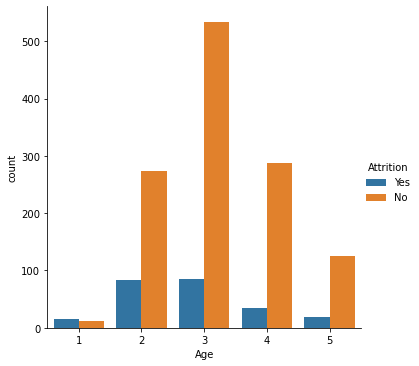

In [138]:
sns.catplot(x='Age',hue='Attrition' ,kind='count',data=df)

**from above graph we can see 30-40 year age group attrition is less.**

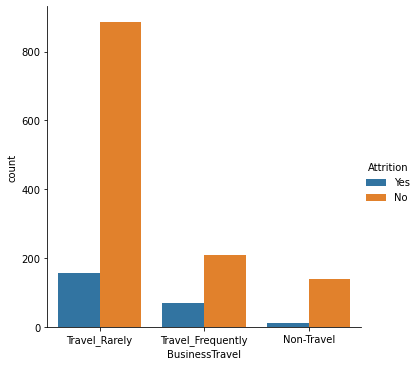

In [140]:
sns.catplot(x='BusinessTravel',hue='Attrition' ,kind='count',data=df)

**As per the graph we can see Employees with frequent travel has highest attrition rate. Then Travel_Rarely and last 
Non_travelers.**

    

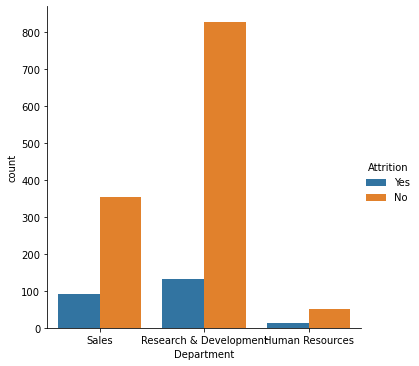

In [147]:
sns.catplot(x='Department',hue='Attrition' ,kind='count',data=df)
#sns.(x='Department',y='Attrition',data=df)

In [148]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [149]:
df.groupby('Attrition')['Department'].value_counts()

Attrition  Department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: Department, dtype: int64

**1) In Research & Development  out of 961 around 133 are Attrited percentage is 14%
2)Sales out of 446 around 92 are Attrited percentage is 21% which is heighest amoungest all.
3)Human Resources 63 around 12 are Attrited percentage is 19%**


<Figure size 2520x1080 with 0 Axes>

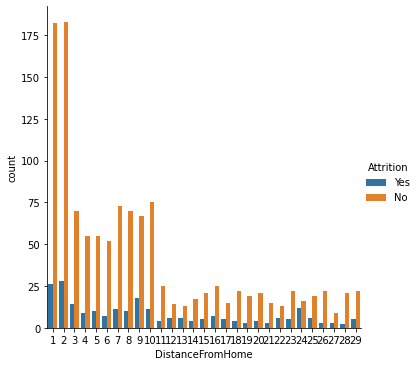

In [45]:
plt.figure(figsize=(35,15))
sns.catplot(x='DistanceFromHome',hue='Attrition',kind='count',data=df)

**'DistanceFromHome' and 'Attrition' has +ve correlation employees living nearby has less attrition rate as compaired to living far.**

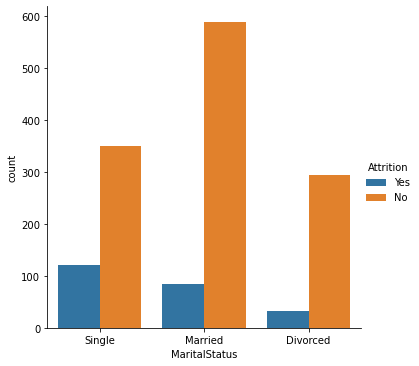

In [41]:
#sns.catplot(x='Department',hue='Attrition' ,kind='count',data=df)
df['MaritalStatus'].unique()
sns.catplot(x='MaritalStatus',hue='Attrition',kind='count',data=df)

**Attrition percentage of Single is very high as compaired to Married and Divorced.** 

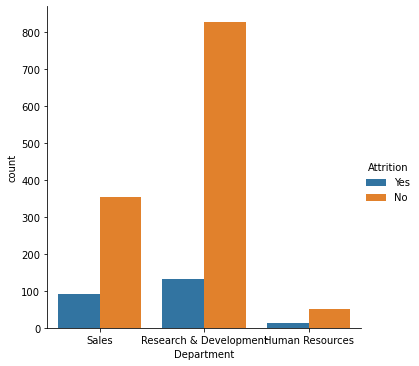

In [61]:

sns.catplot(x='Department',hue='Attrition',kind='count',data=df)

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


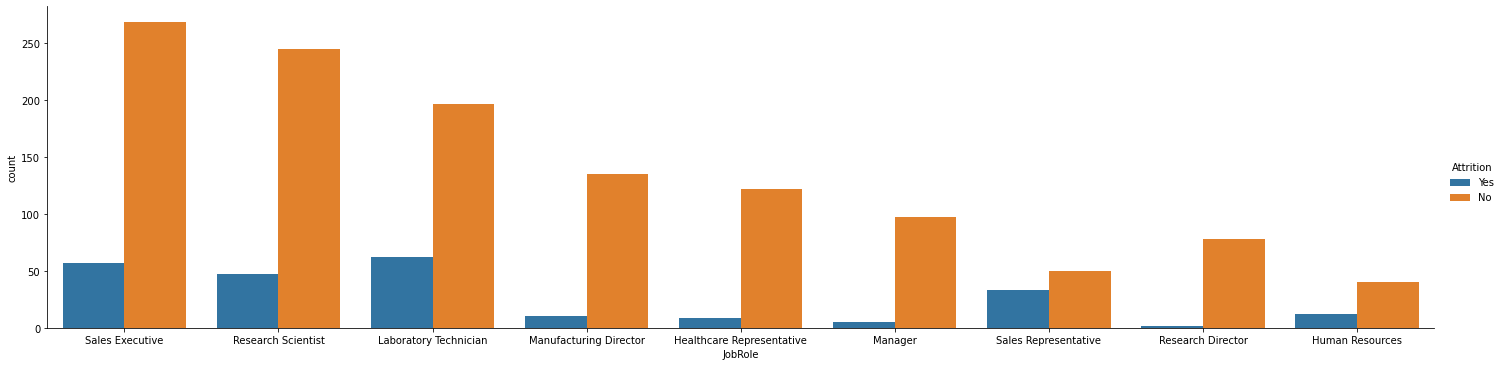

In [66]:
print(df['JobRole'].unique())
sns.catplot(x='JobRole',hue='Attrition',kind='count',data=df,height=5, aspect=4)


**'Sales Representative' has highest rate of Attrition then'Laboratory Technician','Sales Executive' 'Research Scientist','Human Resources'comes.
Very less rate is of 'Research Director' then 'Manufacturing Director' 'Healthcare Representative' 'Manager' comes .Its very important feature.**

[8 1 6 9 0 4 5 2 7 3]


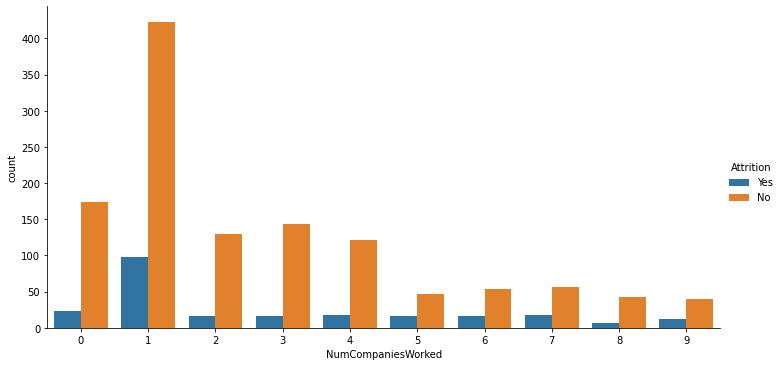

In [69]:
# 
print(df['NumCompaniesWorked'].unique())
sns.catplot(x='NumCompaniesWorked',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate is increasing with increase in NumCompaniesWorked**

[ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]


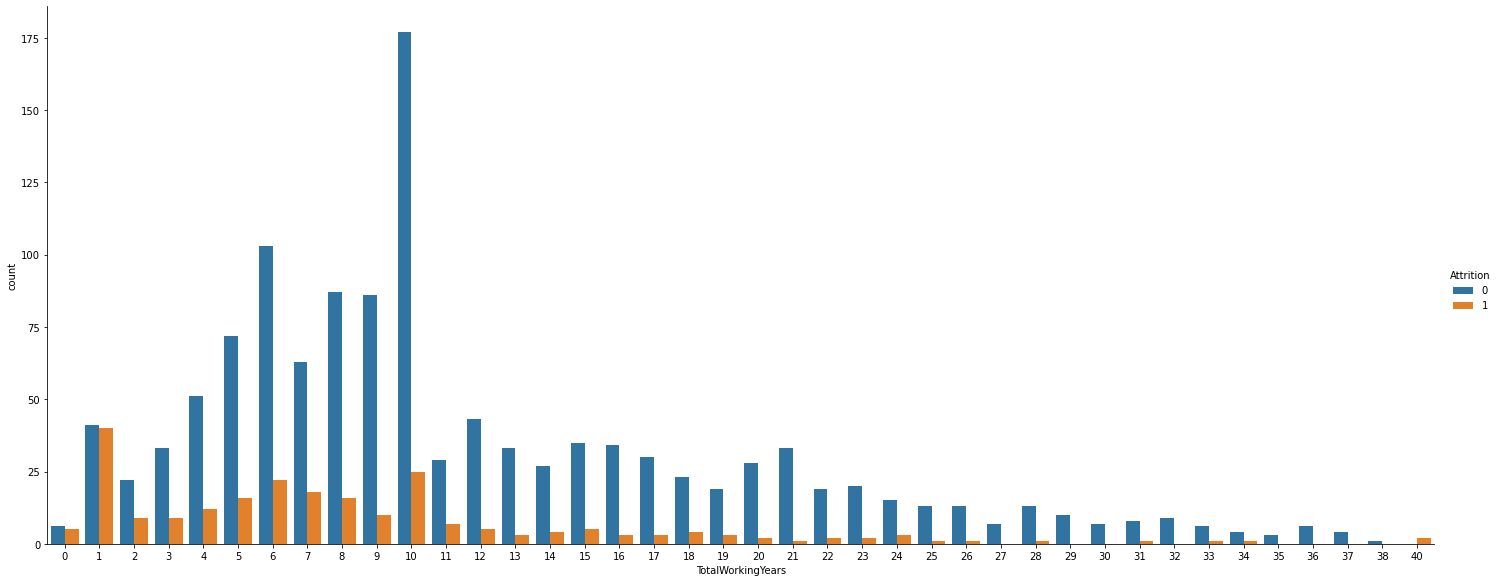

In [92]:
print(df['TotalWorkingYears'].unique())
sns.catplot(x='TotalWorkingYears',hue='Attrition',kind='count',data=df,height=8, aspect=2.5)

**Attrition rate is heighest for 1 yr work exp**

[2 1 3 4 5]


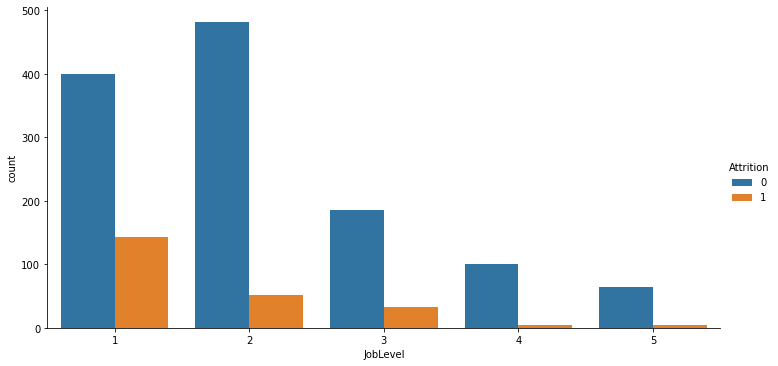

In [94]:
print(df['JobLevel'].unique())
sns.catplot(x='JobLevel',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate -vely correlated with JobLevel, it goes on decreasing as level increases**

[ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]


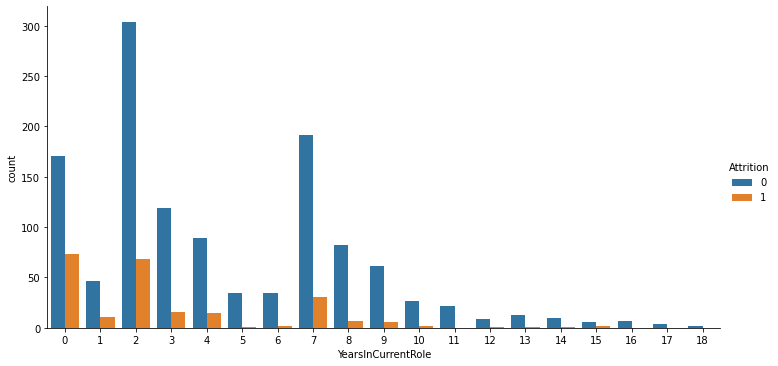

In [95]:
print(df['YearsInCurrentRole'].unique())
sns.catplot(x='YearsInCurrentRole',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate -vely correlated with YearsInCurrentRole, it goes on decreasing as level increases for(0-4) it is high**

[5993 5130 2090 ... 9991 5390 4404]


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

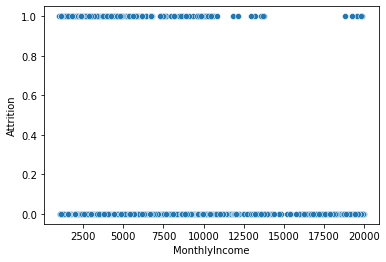

In [99]:
## 'MonthlyIncome' Vs 'Attrition
sns.scatterplot(x='MonthlyIncome',y='Attrition',data=df)

**Attrition rate -vely correlated with MonthlyIncome, for sal between (1000-11000) attrition rate is high**

In [ ]:
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


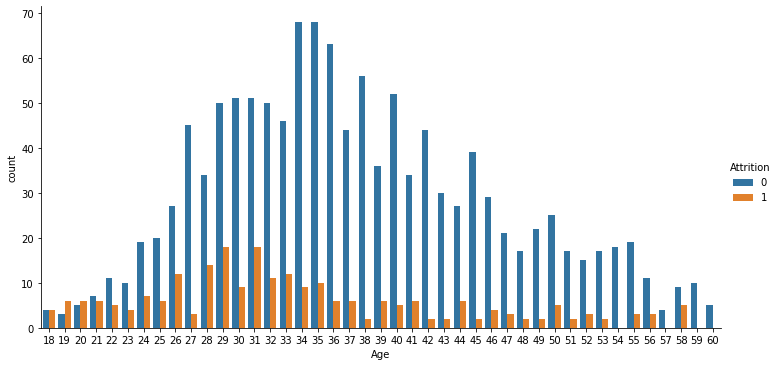

In [102]:
print(df['Age'].unique())
sns.catplot(x='Age',hue='Attrition',kind='count',data=df,height=5, aspect=2)


**Attrition rate -vely correlated with Age, for Age between (18-21) attrition rate is highest then for (23-41)its medium and then its low**

[4 2 3 1]


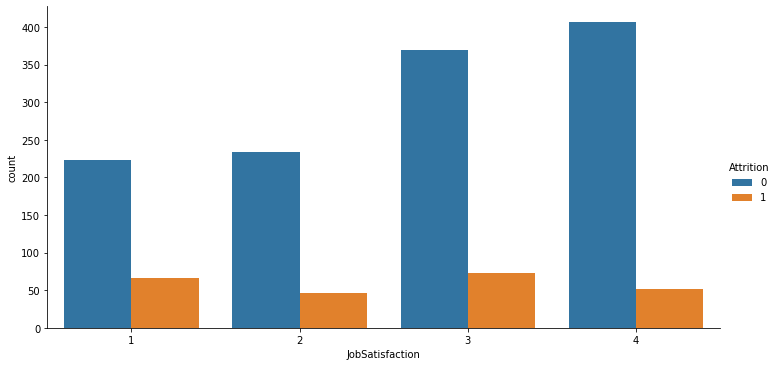

In [103]:
print(df['JobSatisfaction'].unique())
sns.catplot(x='JobSatisfaction',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate -vely correlated with JobSatisfaction, it goes on decreasing as level increases for 1 it is highest**

[0 1 3 2]


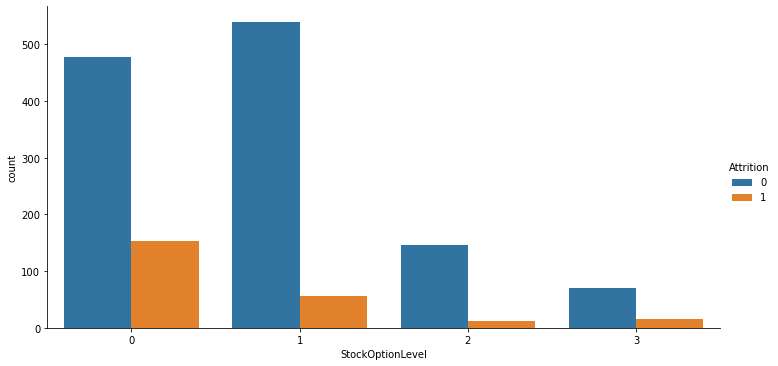

In [105]:
print(df['StockOptionLevel'].unique())
sns.catplot(x='StockOptionLevel',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate -vely correlated with StockOptionLevel, it goes on decreasing as StockOptionLevel increases**

[ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]


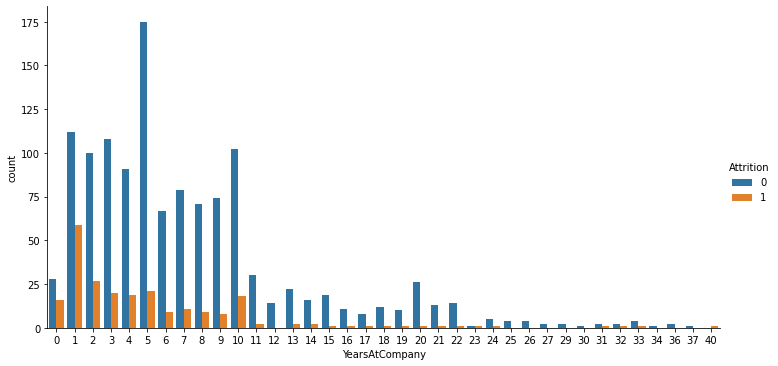

In [107]:
print(df['YearsAtCompany'].unique())
sns.catplot(x='YearsAtCompany',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate -vely correlated with YearsAtCompany, it is heighest for(0-5)yrs.**

[3 2 4 1]


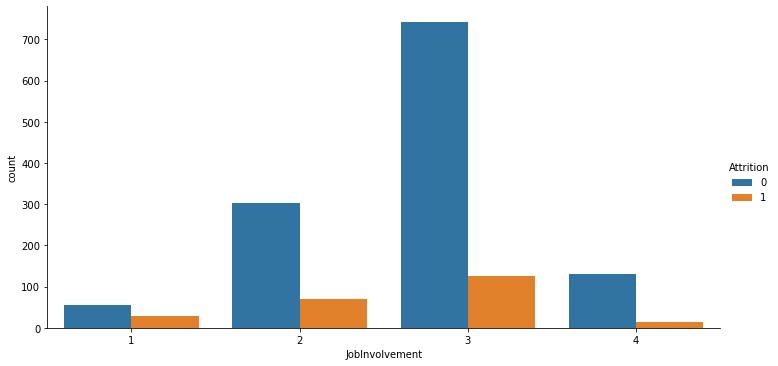

In [109]:
print(df['JobInvolvement'].unique())
sns.catplot(x='JobInvolvement',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate -vely correlated with YearsInCurrentRole, it is heighest for level 1 around(33%)**

In [122]:
# converting age into Age Groups 10-20,21-30,..
age_group=pd.cut(df['Age'], bins=[10,20,30,40,50,60], labels=np.arange(1,6))

In [123]:
pd.cut(df.Age, bins=[10,20,30,40,50,60], right=False)


0       [40, 50)
1       [40, 50)
2       [30, 40)
3       [30, 40)
4       [20, 30)
          ...   
1465    [30, 40)
1466    [30, 40)
1467    [20, 30)
1468    [40, 50)
1469    [30, 40)
Name: Age, Length: 1470, dtype: category
Categories (5, interval[int64]): [[10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60)]

In [124]:
df['Age']=age_group
df['Age'].head()

0    4
1    4
2    3
3    3
4    2
Name: Age, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

[4, 3, 2, 5, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


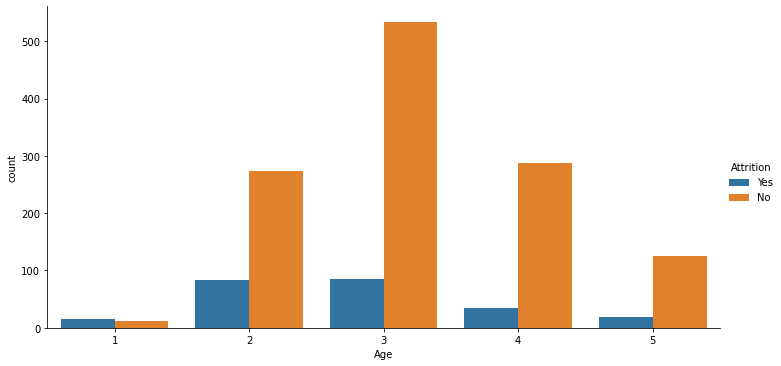

In [125]:
print(df['Age'].unique())
sns.catplot(x='Age',hue='Attrition',kind='count',data=df,height=5, aspect=2)

**Attrition rate -vely correlated with Age. Young employees keeps on switching jobs.**

In [8]:
# catagorical features encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['OverTime']=le.fit_transform(df['OverTime'])

In [176]:
# changing dtype from object to int after LAbleEncoding
df['Attrition'].astype(int)
df['BusinessTravel'].astype(int)
df['Department'].astype(int)
df['EducationField'].astype(int)
df['Gender'].astype(int)
df['JobRole'].astype(int)
df['MaritalStatus'].astype(int)
df['OverTime'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [186]:
# correlation Matrix
round(df.corr(),2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,-0.16,0.02,0.01,-0.03,-0.00,0.21,-0.04,-0.01,0.01,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,-0.16,1.00,0.00,-0.06,0.06,0.08,-0.03,0.03,-0.01,-0.10,...,0.00,-0.05,-0.14,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
BusinessTravel,0.02,0.00,1.00,-0.00,-0.01,-0.02,0.00,0.02,-0.02,0.00,...,-0.03,-0.04,-0.02,0.03,0.02,-0.01,-0.01,-0.01,-0.03,-0.02
DailyRate,0.01,-0.06,-0.00,1.00,0.01,-0.00,-0.02,0.04,-0.05,0.02,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
Department,-0.03,0.06,-0.01,0.01,1.00,0.02,0.01,0.01,-0.01,-0.02,...,-0.02,-0.02,-0.01,-0.02,0.04,0.03,0.02,0.06,0.04,0.03
DistanceFromHome,-0.00,0.08,-0.02,-0.00,0.02,1.00,0.02,0.00,0.03,-0.02,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.03,0.00,-0.02,0.01,0.02,1.00,-0.04,0.04,-0.03,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EducationField,-0.04,0.03,0.02,0.04,0.01,0.00,-0.04,1.00,-0.00,0.04,...,-0.01,-0.00,-0.02,-0.03,0.05,0.04,-0.02,-0.01,0.00,-0.00
EmployeeNumber,-0.01,-0.01,-0.02,-0.05,-0.01,0.03,0.04,-0.00,1.00,0.02,...,-0.02,-0.07,0.06,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01
EnvironmentSatisfaction,0.01,-0.10,0.00,0.02,-0.02,-0.02,-0.03,0.04,0.02,1.00,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00


<AxesSubplot:>

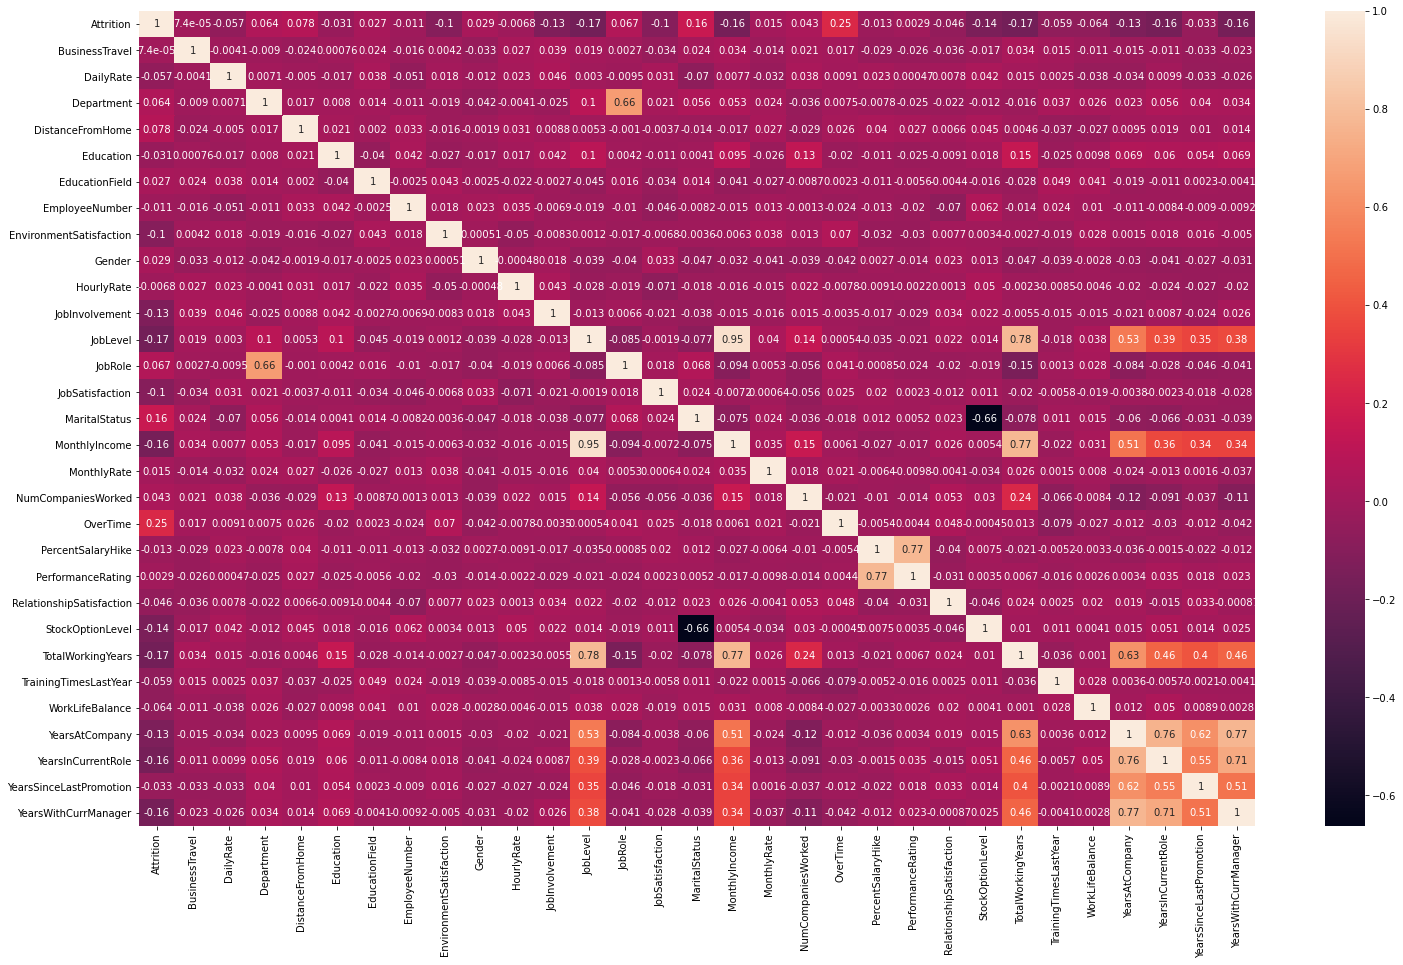

In [145]:
# correlation Matrix
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

In [146]:
# correlation with Attrition
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
M

**+vely correlated Features with target:**
    OverTime  ,
    MaritalStatus, 
    DistanceFromHome,   
    JobRole,      
    Department,        
    NumCompaniesWorked ,  
    Gender  ,               
    EducationField  ,       
    MonthlyRate,           
    PerformanceRating,        
    BusinessTravel, 
**-vely correlated Features with target:**
    HourlyRate   
    EmployeeNumber     
    Education                
    YearsSinceLastPromotion
    RelationshipSatisfaction  
    DailyRate              
    TrainingTimesLastYear
    EnvironmentSatisfaction    
    JobSatisfaction           
    JobInvolvement             
    YearsAtCompany            
    StockOptionLevel           
    YearsWithCurrManager      
    Age                       
    MonthlyIncome              
    YearsInCurrentRole        
    JobLevel                   
    TotalWorkingYears

Text(0.5, 1.0, 'Correlation with target')

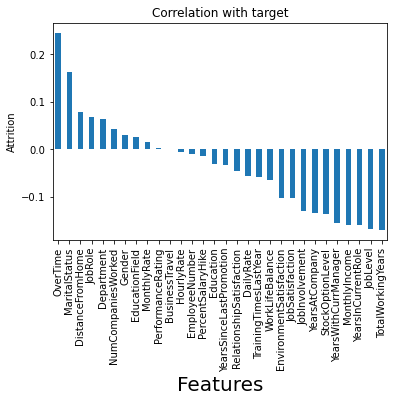

In [131]:
#Correlation with target
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Attrition')
plt.title('Correlation with target')

<AxesSubplot:xlabel='OverTime', ylabel='Attrition'>

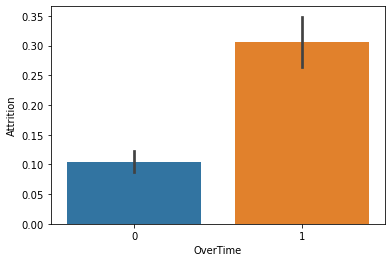

In [31]:
sns.barplot('OverTime','Attrition',data=df)

In [32]:
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [33]:
df.groupby('Attrition')['OverTime'].value_counts()

Attrition  OverTime
0          0           944
           1           289
1          1           127
           0           110
Name: OverTime, dtype: int64

**-Attrition rate of employees having Overtime 1 is very high (out of 416(127) are attrited 30%)
-Attrition rate of employees having Overtime 0 is very high (out of 1054(110) are attrited 11%)**

### Checking Data Skewness

In [147]:
df.skew()

Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

**After considering accepltable range +/-0.5 there is skewness is present in many features**

### Remove Skewness by Power Transform method

In [10]:
from sklearn.preprocessing import power_transform
df_skew=df.drop('Attrition' , axis=1)
df_new= power_transform( df_skew , method='yeo-johnson')

cols=df_skew.columns
df_new=pd.DataFrame(df_new , columns=cols)

#check the skewness in df
df_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
Y

#### Checking for Outliers

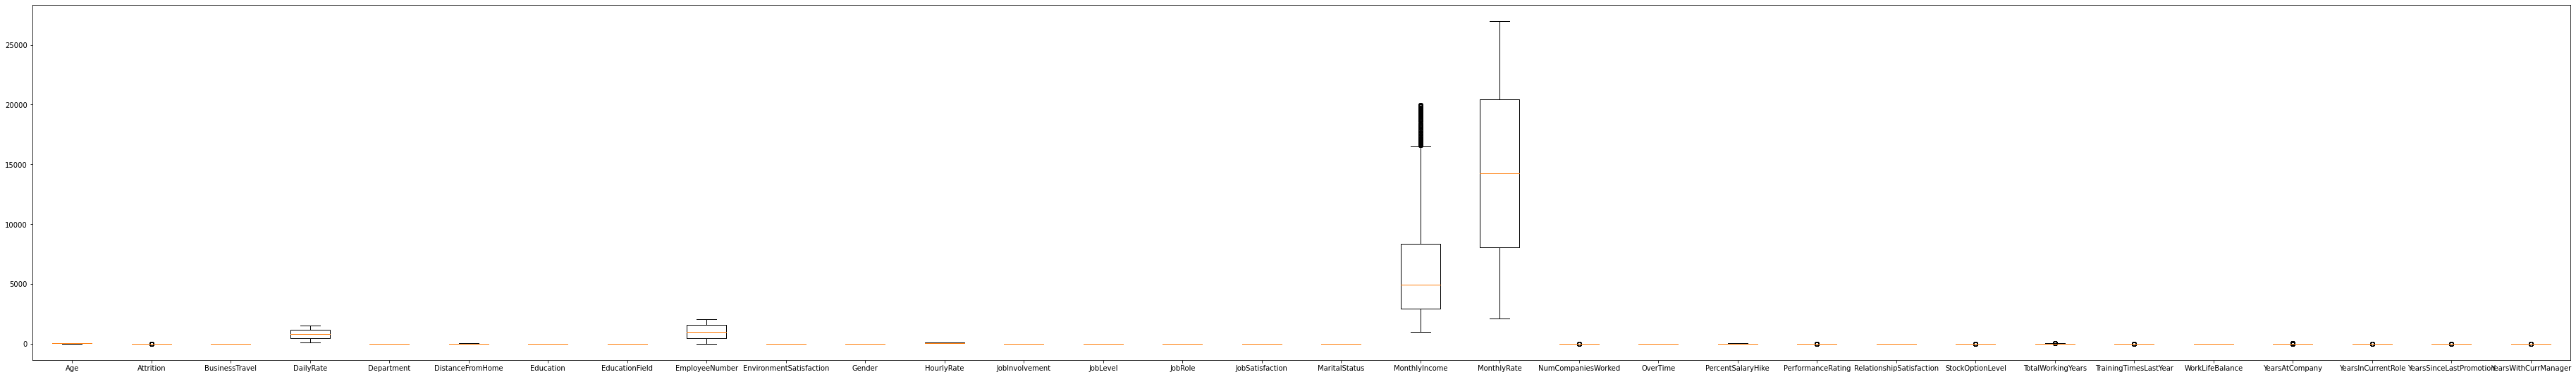

In [11]:
fig = plt.figure(figsize =(50,7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot

bp = ax.boxplot(df ,data=df,labels=df.columns)

# show plot
plt.show()

**we can see there are few outliers present in monthly income .**

In [12]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.4463504  2.28090588 0.59004834 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 0.4384223  0.91319439 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   2.28090588 0.59004834 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 0.4384223  0.59004834 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.4384223  0.91319439 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.4384223  0.59004834 ... 0.33939374 0.36871529 0.59522723]]


In [13]:
threshold = 3
#print index no
print("Indexes at which Outliers are present.")
print(np.where(z > 3))

Indexes at which Outliers are present.
(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 

In [14]:
# No of outliers present
len(np.where(z>3)[0])

110

In [15]:
df.shape

(1470, 32)

In [16]:
 
#% data loss
loss=100-((1470-110)/1470*100)
print("% data loss due to droping outliers is :",loss)

% data loss due to droping outliers is : 7.482993197278915


In [17]:
## Droping outliers
df_new=df.drop([28,45,62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430])

In [18]:
df_new.shape

(1387, 32)

### finding Inter correlation

In [19]:

# function to select for highly correlated features. 
#will remove first feature which is highly correlared with any other feature

def correlation(dataset , threshold):
    col_corr =set() # set of all names of correlated features we have taken st from preventing duplicate entries of columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j]> threshold):
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [20]:
#Finding Multicolinearity
cor_features=correlation(df ,0.9)
len(cor_features)

1

In [21]:
cor_features

{'MonthlyIncome'}

In [22]:
df.corr()['MonthlyIncome'].sort_values(ascending=False)

MonthlyIncome               1.000000
JobLevel                    0.950300
TotalWorkingYears           0.772893
YearsAtCompany              0.514285
Age                         0.497855
YearsInCurrentRole          0.363818
YearsSinceLastPromotion     0.344978
YearsWithCurrManager        0.344079
NumCompaniesWorked          0.149515
Education                   0.094961
Department                  0.053130
MonthlyRate                 0.034814
BusinessTravel              0.034319
WorkLifeBalance             0.030683
RelationshipSatisfaction    0.025873
DailyRate                   0.007707
OverTime                    0.006089
StockOptionLevel            0.005408
EnvironmentSatisfaction    -0.006259
JobSatisfaction            -0.007157
EmployeeNumber             -0.014829
JobInvolvement             -0.015271
HourlyRate                 -0.015794
DistanceFromHome           -0.017014
PerformanceRating          -0.017120
TrainingTimesLastYear      -0.021736
PercentSalaryHike          -0.027269
G

**as 'MonthlyIncome' has 95% correlation with 'JobLevel'  will drop it**

In [23]:
## droping MonthlyIncome
df=df_new
df.drop('MonthlyIncome',axis=1,inplace=True)

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


#### Data splitting for model training

#### Model1 LogisticRegression
df.columns

In [26]:
# splitting target and input variables
y=df['Attrition']
x=df.drop('Attrition',axis=1)


In [27]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [28]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
lr=LogisticRegression()


#### will try to find out best value Random State

In [30]:
max_accu = 0
max_randst = 0
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    
    pred_lr=lr.predict(x_test)
    accu_score= accuracy_score(y_test,pred_lr)
    if max_accu<accu_score:
        max_accu= accu_score
        max_randst= i

      

In [31]:
print("max accuracy score is :", round(max_accu*100 ,1),"at random state :",max_randst)

max accuracy score is : 89.9 at random state : 431


In [199]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=431)
lr.fit(x_train,y_train)
    
pred_lr=lr.predict(x_test)
accu_score= accuracy_score(y_test,pred_lr)

In [200]:
round(accu_score*100 ,1)

89.9

In [201]:
Model_report=pd.DataFrame(columns=['Model_name','Balance','Accuracy_Score','Confusion_matrix'])

In [202]:
def model_report_append(name,bal,accu,confu_mat):
    Model_report=Model_report.append({
                                   'Model_name':name,'Balance':bal,
                                   'Accuracy_Score':accu,
                                   'Confusion_matrix':confu_mat},ignore_index=True)
    

In [203]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

print("Accuracy score is :",round(accu_score*100 ,1) ,'\n')
print("Confusion_matrix is :\n")
print(confusion_matrix(y_test,pred_lr),'\n')
print("Classification report :\n")
print(classification_report(y_test,pred_lr))

Model_report=Model_report.append({
                                   'Model_name':' LogisticRegression','Balance':'Imbalanced',
                                   'Accuracy_Score':round(accu_score*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,pred_lr)},ignore_index=True)

Accuracy score is : 89.9 

Confusion_matrix is :

[[249   0]
 [ 28   1]] 

Classification report :

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       249
           1       1.00      0.03      0.07        29

    accuracy                           0.90       278
   macro avg       0.95      0.52      0.51       278
weighted avg       0.91      0.90      0.85       278



In [204]:
Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,LogisticRegression,Imbalanced,89.9,"[[249, 0], [28, 1]]"


In [205]:
df['Attrition'].value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

#### we can see given dataset is imbalance dataset , we will use RandomOverSampler to handle it.

### Using Over Sampling 

In [206]:
from imblearn.over_sampling import RandomOverSampler

In [207]:
# making both 1's and 0's equal in no.RandomOverSampler(1)by 1
os=RandomOverSampler(1)

x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print(f"The number of classes before fit {y_train.value_counts()}")
print(" ")
print(f"The number of c lasses after fit {y_train_ns.value_counts()}")

The number of classes before fit 0    909
1    200
Name: Attrition, dtype: int64
 
The number of c lasses after fit 0    909
1    909
Name: Attrition, dtype: int64


#### we can obeserve now value count of 1's is increased from 200 to 909 (909*1) afteroversampling .now the dataset has become quite balanced.

In [208]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [209]:
# 
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model_report=Model_report.append({
                                   'Model_name':' RandomForestClassifier','Balance':'Balanced using Over Sampling',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,pred_lr)},ignore_index=True)

[[243   6]
 [ 20   9]]
0.9064748201438849
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       249
           1       0.60      0.31      0.41        29

    accuracy                           0.91       278
   macro avg       0.76      0.64      0.68       278
weighted avg       0.89      0.91      0.89       278



In [210]:
Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,LogisticRegression,Imbalanced,89.9,"[[249, 0], [28, 1]]"
1,RandomForestClassifier,Balanced using Over Sampling,90.6,"[[249, 0], [28, 1]]"


### using SMOTE

In [211]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [212]:
os=SMOTETomek(1)
x_train_sm,y_train_sm=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 909, 1: 200})
The number of classes after fit Counter({1: 909, 0: 909})


In [213]:
from sklearn.ensemble import RandomForestClassifier

classifier_smot=RandomForestClassifier()
classifier_smot.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [214]:
y_pred=classifier_smot.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Model_report=Model_report.append({
                                   'Model_name':' RandomForestClassifier','Balance':'Balanced using SMOT',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,y_pred)},ignore_index=True)

[[230  19]
 [ 18  11]]
0.8669064748201439
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       249
           1       0.37      0.38      0.37        29

    accuracy                           0.87       278
   macro avg       0.65      0.65      0.65       278
weighted avg       0.87      0.87      0.87       278



### SVC Model-2

In [215]:
from sklearn.svm import SVC
class_weight=dict({0:1,1:500})
sv = SVC()
sv.fit(x_train_ns,y_train_ns)

SVC()

In [216]:
y_pred=sv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model_report=Model_report.append({
                                   'Model_name':' SVC','Balance':'Balanced using Over Sampling',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,y_pred)},ignore_index=True)

[[ 96 153]
 [  9  20]]
0.4172661870503597
              precision    recall  f1-score   support

           0       0.91      0.39      0.54       249
           1       0.12      0.69      0.20        29

    accuracy                           0.42       278
   macro avg       0.51      0.54      0.37       278
weighted avg       0.83      0.42      0.51       278



### Decision Tree Model-4

In [217]:
def model_implement(model_ref ,x_train,x_test,y_train,y_test):
    model_ref.fit(x_train,y_train)
    predrf=sv.predict(x_test)
    print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2),'\n')
    print(confusion_matrix(y_test,predrf),'\n')
    print("Classification Report score is :\n")
    print(classification_report(y_test,predrf))

In [218]:
dc.fit(x_train_ns,y_train_ns)
y_pred=dc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model_report=Model_report.append({
                                   'Model_name':' SVC','Balance':'Balanced using Over Sampling',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,y_pred)},ignore_index=True)

[[216  33]
 [ 21   8]]
0.8057553956834532
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       249
           1       0.20      0.28      0.23        29

    accuracy                           0.81       278
   macro avg       0.55      0.57      0.56       278
weighted avg       0.84      0.81      0.82       278



In [219]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train_ns,y_train_ns)
y_pred=dc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
Model_report=Model_report.append({
                                   'Model_name':'DecisionTreeClassifier','Balance':'Balanced using Over Sampling',
                                   'Accuracy_Score':round(accuracy_score(y_test,y_pred)*100 ,1),
                                   'Confusion_matrix':confusion_matrix(y_test,y_pred)},ignore_index=True)

[[214  35]
 [ 23   6]]
0.7913669064748201
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       249
           1       0.15      0.21      0.17        29

    accuracy                           0.79       278
   macro avg       0.52      0.53      0.53       278
weighted avg       0.82      0.79      0.81       278



In [225]:

Model_report

,Model_name,Balance,Accuracy_Score,Confusion_matrix
0,LogisticRegression,Imbalanced,89.9,"[[249, 0], [28, 1]]"
1,RandomForestClassifier,Balanced using Over Sampling,90.6,"[[249, 0], [28, 1]]"
2,RandomForestClassifier,Balanced using SMOT,86.7,"[[230, 19], [18, 11]]"
3,SVC,Balanced using Over Sampling,41.7,"[[96, 153], [9, 20]]"
5,DecisionTreeClassifier,Balanced using Over Sampling,79.1,"[[214, 35], [23, 6]]"


#### from above readings after studing accuracy score and confusion matrix ,and Classification report will go with 'RandomForestClassifier'  with smot 

Model_report

### hyperparameter Tunning  'RandomForestClassifier'

In [221]:
from sklearn.model_selection import GridSearchCV

In [228]:

max_depth =[2,4,6]
class_weight_options = ["balanced", "balanced_subsample"]
criterion=["gini", "entropy"]

param_grid = dict(max_depth=max_depth, class_weight = class_weight_options,criterion=criterion)

grid = GridSearchCV(classifier_smot, param_grid, cv=12, scoring = 
'accuracy')
grid.fit(x_train_sm,y_train_sm)
grid.best_params_

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 6}

In [229]:
classifier_smot.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [232]:
### prediction with best parameter
grid_pred=grid.best_estimator_.predict(x_test) 
# best score 
accuracy_score(y_test,grid_pred)
print(confusion_matrix(y_test,grid_pred))
print(accuracy_score(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

[[218  31]
 [ 13  16]]
0.841726618705036
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       249
           1       0.34      0.55      0.42        29

    accuracy                           0.84       278
   macro avg       0.64      0.71      0.66       278
weighted avg       0.88      0.84      0.86       278



### ROC AUC plot

Text(0.5, 1.0, 'ROC AUC PLOT')

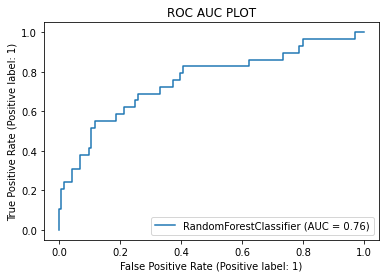

In [233]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test , y_test)
plt.title("ROC AUC PLOT")

### AUC is 0.76 and Accuracy is 0.84 which is good .

In [235]:
import joblib
joblib.dump(grid.best_estimator_,"HR_analytics.pkl")

['HR_analytics.pkl']